# K-Means

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from kmeans import KMeans
import matplotlib.pyplot as plt
from utils import plot_clusters

In [5]:
# Load data
df = pd.read_csv('../data/country-data.csv')
countries = df['country']
X = df.drop('country', axis=1)

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

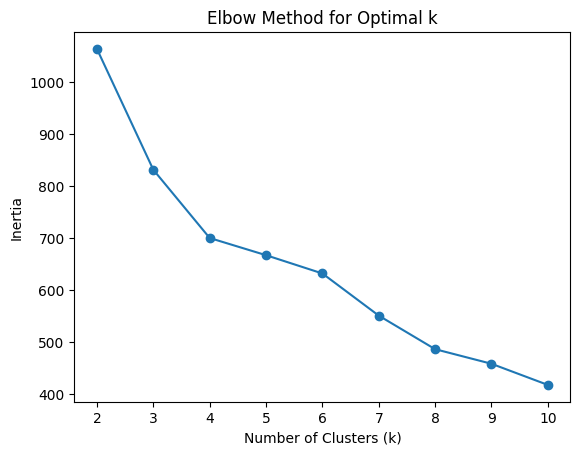

In [14]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(np.sum([np.linalg.norm(X_scaled[kmeans.labels == i] - kmeans.centroids[i])**2 for i in range(k)]))

# Plot Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

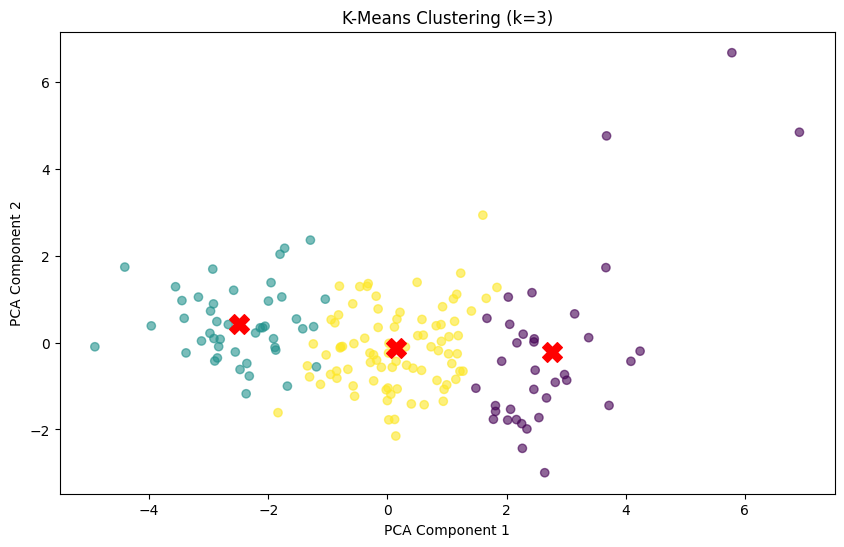

In [39]:
# Train with k=3 (based on elbow curve)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
plot_clusters(X_scaled, kmeans.labels, kmeans.centroids, 'K-Means Clustering (k=3)')

In [36]:
# Assign cluster labels to the original dataframe
df['cluster'] = kmeans.labels

# Calculate mean values for each cluster
cluster_summary = df.drop('country', axis=1).groupby('cluster').mean()
print(cluster_summary)

         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0         92.961702  29.151277  6.388511  42.323404   3942.404255  12.019681   
1         21.927381  40.243917  6.200952  47.473404  12305.595238   7.600905   
2          5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   

         life_expec  total_fer          gdpp  
cluster                                       
0         59.187234   5.008085   1922.382979  
1         72.814286   2.307500   6486.452381  
2         80.127778   1.752778  42494.444444  


### Scikit-Learn K-Means

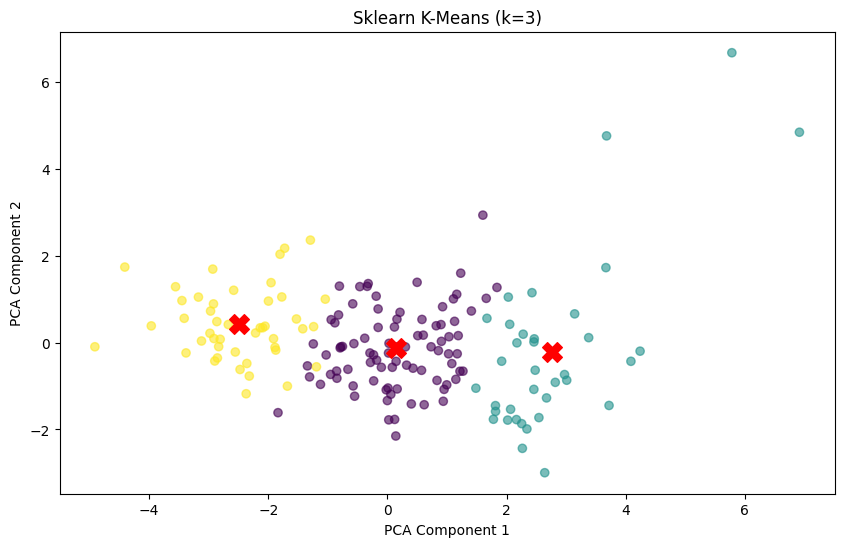

In [38]:
from sklearn.cluster import KMeans as SKMeans

sk_kmeans = SKMeans(n_clusters=3, random_state=42)
sk_labels = sk_kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, sk_labels, sk_kmeans.cluster_centers_, 'Sklearn K-Means (k=3)')